<a href="https://colab.research.google.com/github/Utsav2408/Heart-Disease-Using-SVM/blob/main/EDA_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date.

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. Exploratory data analysis was promoted by John Tukey to encourage statisticians to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HD_Cleveland_Dataset.csv to HD_Cleveland_Dataset.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now, we are uploading our data set to the data variable using the read_csv function in the pandas library.

In [ ]:
df = pd.read_csv('HD_Cleveland_Dataset.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,N
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Y
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,Y
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,N
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57,0,4,140,241,0,0,123,1,0.2,2,0,7,Y
293,45,1,1,110,264,0,0,132,0,1.2,2,0,7,Y
294,68,1,4,144,193,1,0,141,0,3.4,2,2,7,Y
295,57,1,4,130,131,0,0,115,1,1.2,2,1,7,Y


info() is a function which gives us information related to the columns of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slop      297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  target    297 non-null    object 
dtypes: float64(1), int64(12), object(1)
memory usage: 32.6+ KB


age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

Both the head() and tail() functions have a value of 5 by default. different values should be given as parameters to change these values.

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,N
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Y
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,Y
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,N
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,N


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,target
292,57,0,4,140,241,0,0,123,1,0.2,2,0,7,Y
293,45,1,1,110,264,0,0,132,0,1.2,2,0,7,Y
294,68,1,4,144,193,1,0,141,0,3.4,2,2,7,Y
295,57,1,4,130,131,0,0,115,1,1.2,2,1,7,Y
296,57,0,2,130,236,0,2,174,0,0.0,2,1,3,Y


For the categorical varibles, we need to create dummy variables. I'm also going to drop the first category of each. For example, rather than having 'N' and 'Y', we'll have 'N' with values of 0 or 1 (1 being Y, and 0 therefore being N).

In [ ]:
df['target'] = pd.get_dummies(df['target'], drop_first=True)

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
293,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
294,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
295,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slop        0
ca          0
thal        0
target      0
dtype: int64

Describe function is a function that allows analysis between the numerical values contained in the data set. Using this function count, mean, std, min, max, 25%, 50%, 75%.

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


Correlation is a statistical technique that can show whether and how strongly pairs of variables are related. For example, height and weight are related; taller people tend to be heavier than shorter people.

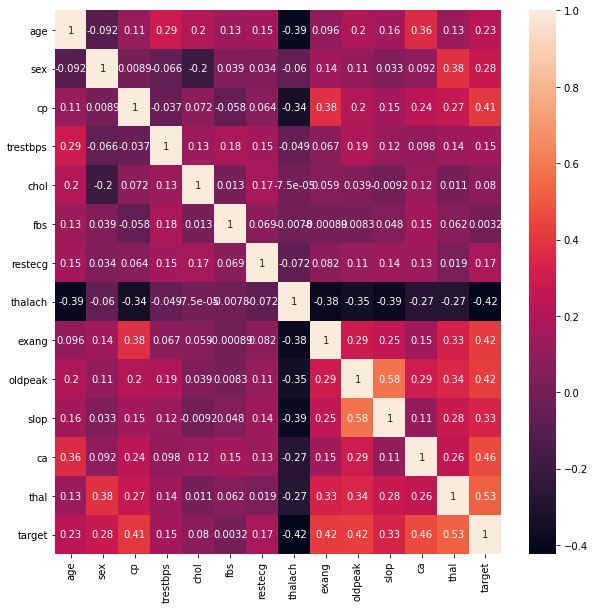

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9d7f134a8>,
      dtype=object)

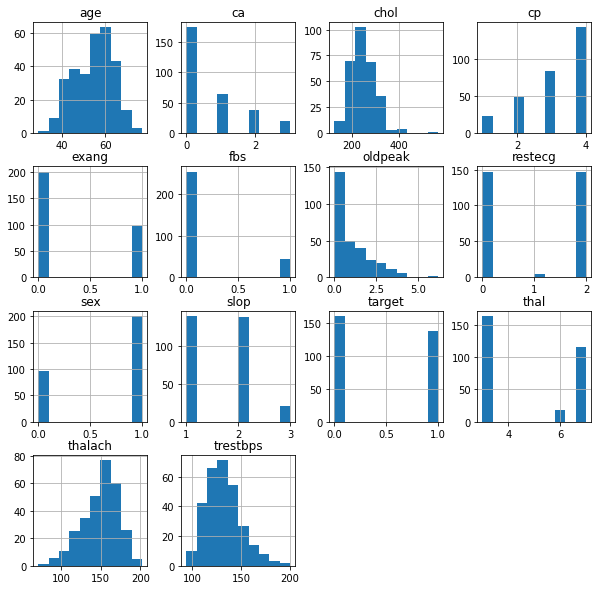

In [ ]:
df.hist(figsize = (10,10))

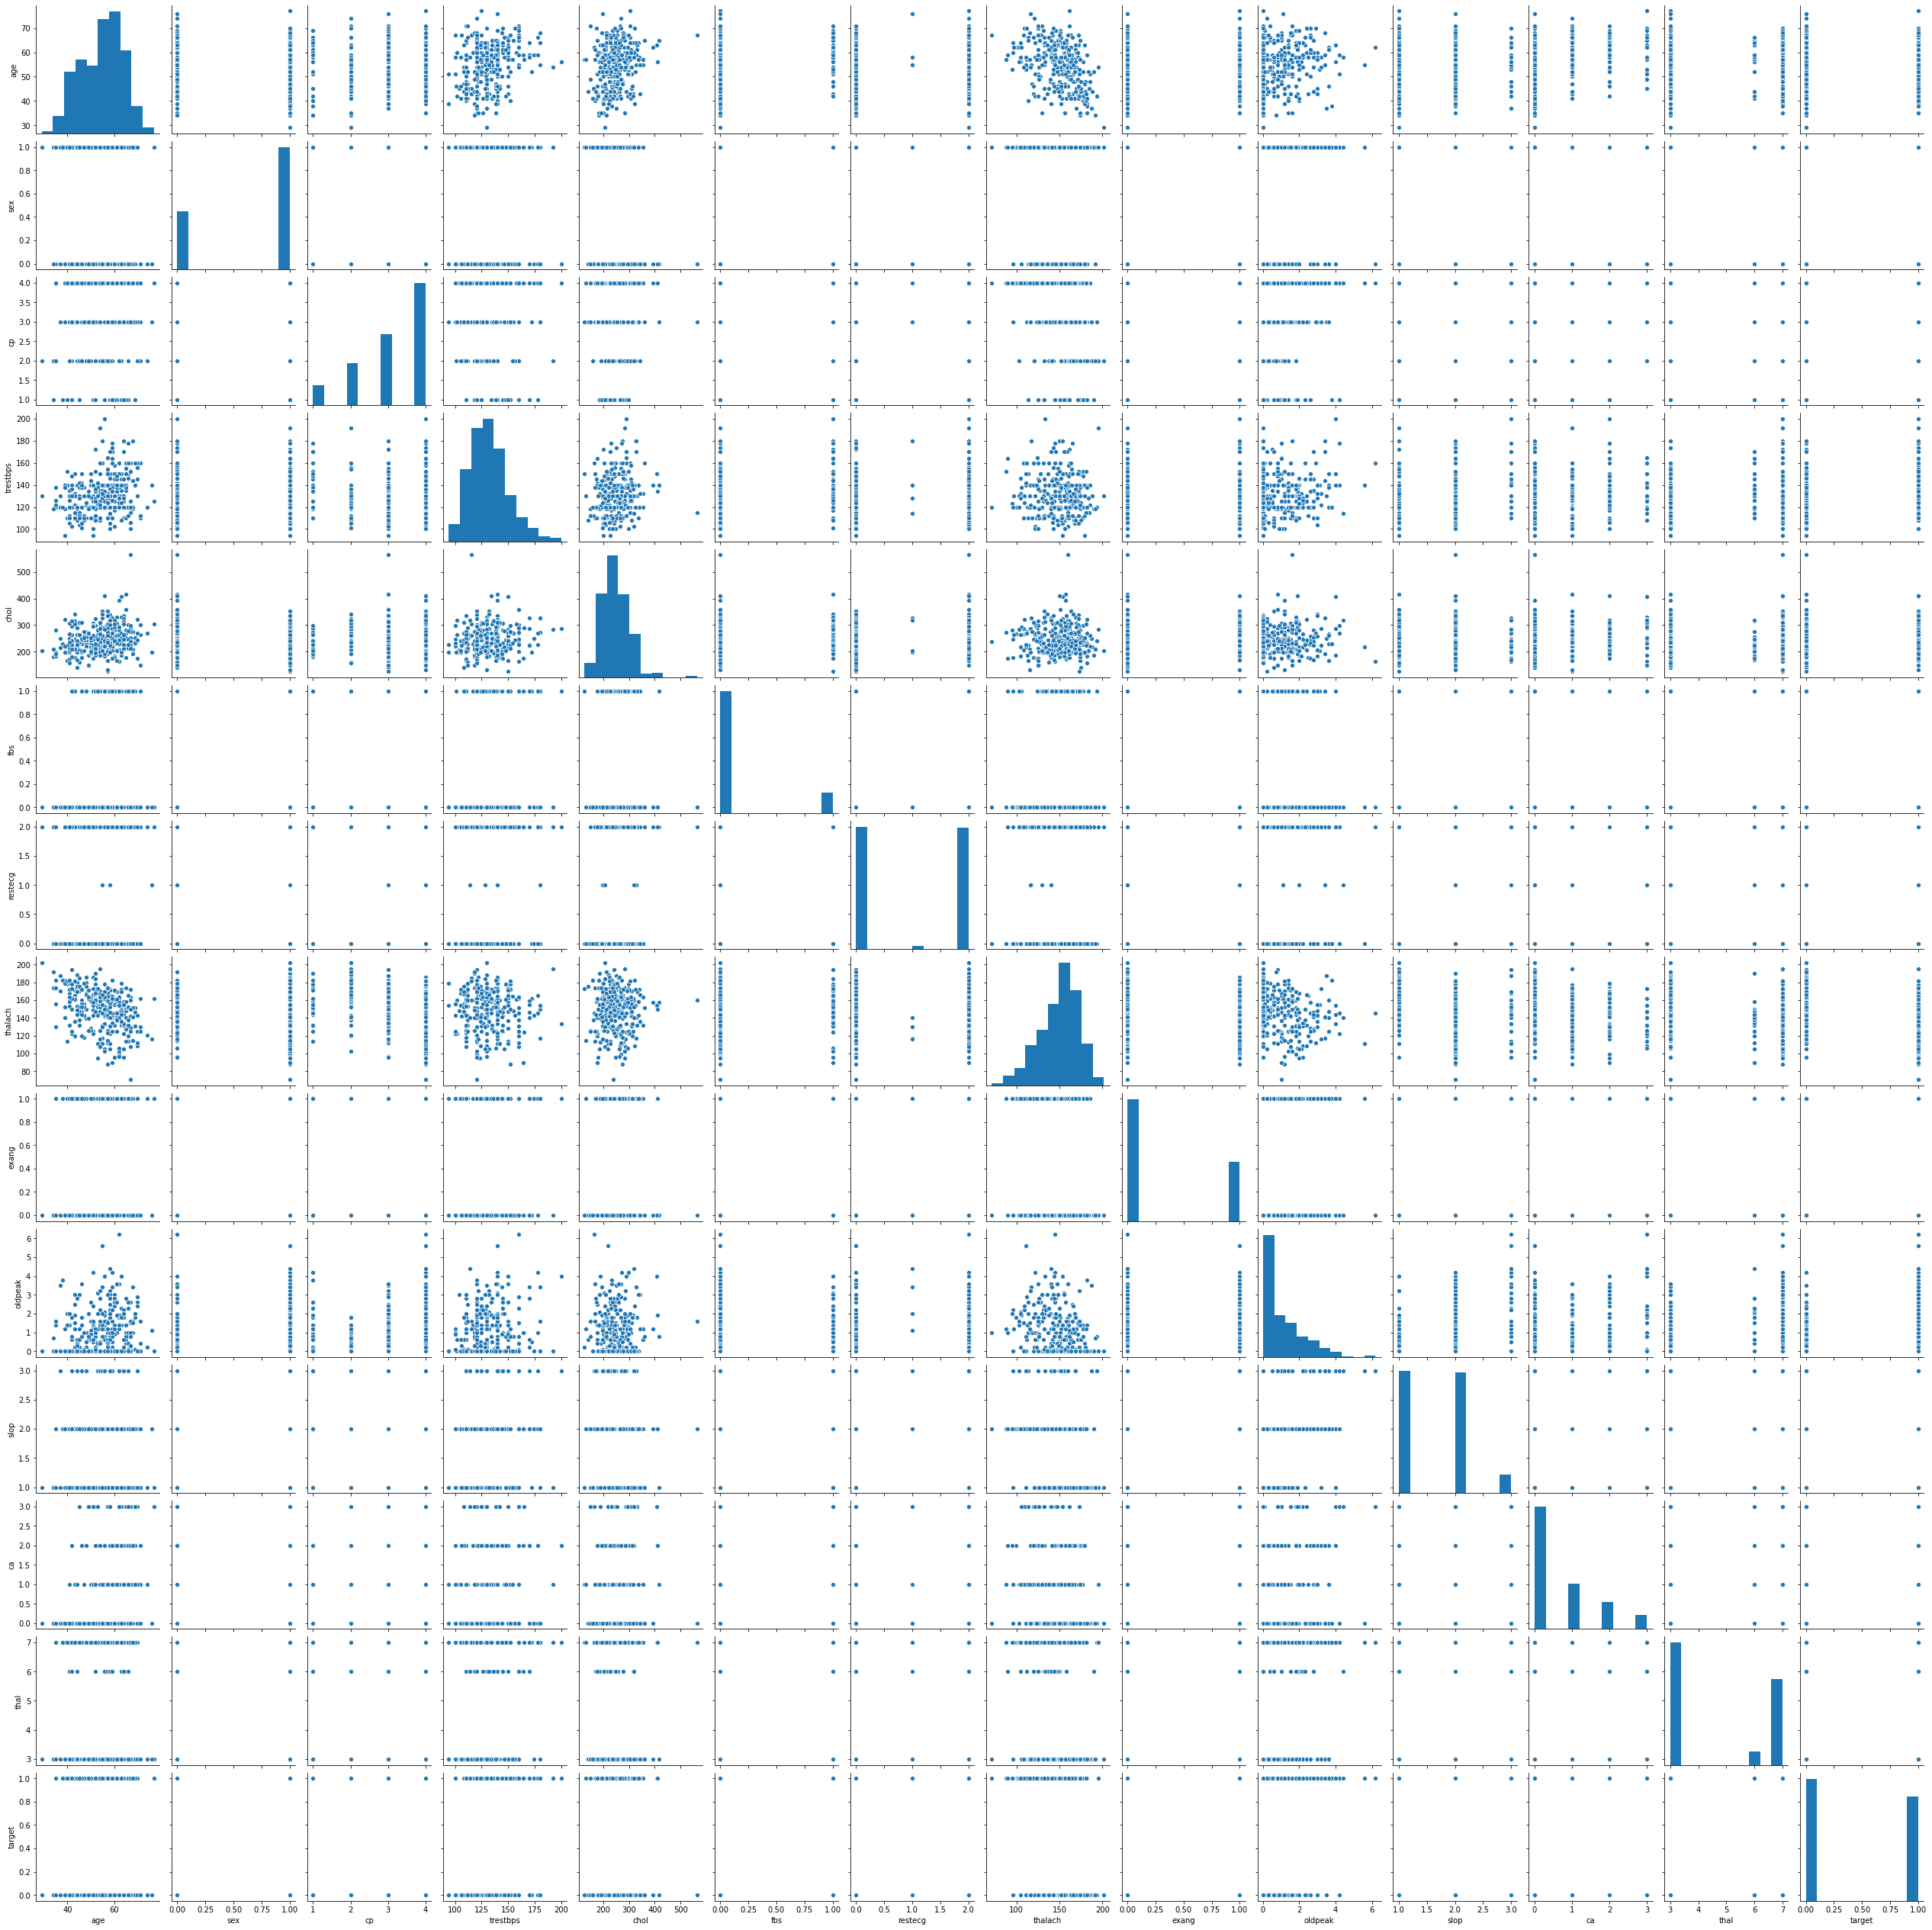

In [ ]:
sns.pairplot(df)

In [ ]:
df['trestbps'].value_counts()

120    37
130    36
140    32
110    19
150    17
160    11
138    10
125    10
128    10
112     9
132     7
118     7
124     6
135     6
108     6
145     5
134     5
152     5
122     4
170     4
100     4
115     3
142     3
105     3
136     3
126     3
180     3
102     2
94      2
144     2
146     2
178     2
148     2
129     1
164     1
101     1
174     1
104     1
172     1
106     1
165     1
114     1
158     1
192     1
156     1
117     1
155     1
154     1
123     1
200     1
Name: trestbps, dtype: int64

Blood pressure is the force against the walls of your arteries as your heart pumps blood throughout your body. We use the defined by the American Heart Association to guide us when diagnosing and treating hypertension.

When your doctor measures your blood pressure, you’re given two numbers – your systolic pressure and your diastolic pressure:

Your systolic pressure (the top number) is the pressure in your arteries as your heart beats. “Normal” systolic pressure is less than 120 millimeters of mercury (mm Hg).

Your diastolic pressure (the bottom number) is the pressure in your arteries in between heartbeats. “Normal” diastolic pressure is less than 80 mm Hg.

For the average person who is not at high risk for hypertension, we aim for a total blood pressure of 120/80 or lower. If your blood pressure is higher than 120/80, you could be at risk for heart disease.

In [ ]:
bps = df['trestbps']

In [ ]:
bps

0      145
1      160
2      120
3      130
4      130
      ... 
292    140
293    110
294    144
295    130
296    130
Name: trestbps, Length: 297, dtype: int64

In [ ]:
bps = bps.apply(lambda c: 1 if c>120 else 0)

In [ ]:
bps

0      1
1      1
2      0
3      1
4      1
      ..
292    1
293    0
294    1
295    1
296    1
Name: trestbps, Length: 297, dtype: int64

In [ ]:
bps.value_counts()

1    200
0     97
Name: trestbps, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


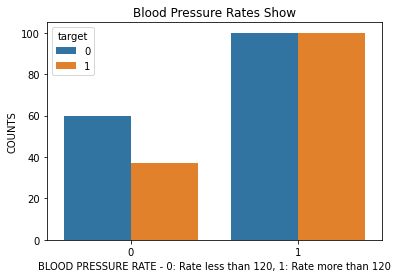

In [ ]:
sns.countplot(bps,hue=df['target'])
plt.title('Blood Pressure Rates Show')
plt.xlabel('BLOOD PRESSURE RATE - 0: Rate less than 120, 1: Rate more than 120')
plt.ylabel('COUNTS')
plt.show()

Total Cholesterol	Category

Less than 200	Desirable

200 - 239	Borderline High

240 and above	High
 

In [ ]:
chol = df['chol']

In [ ]:
chol

0      233
1      286
2      229
3      250
4      204
      ... 
292    241
293    264
294    193
295    131
296    236
Name: chol, Length: 297, dtype: int64

In [ ]:
chol = chol.apply(lambda c: 0 if c<200 else 1 if ((c>=200) and (c<240)) else 2)

In [ ]:
chol

0      1
1      2
2      1
3      2
4      1
      ..
292    2
293    2
294    0
295    0
296    1
Name: chol, Length: 297, dtype: int64

In [ ]:
chol.value_counts()

2    155
1     94
0     48
Name: chol, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


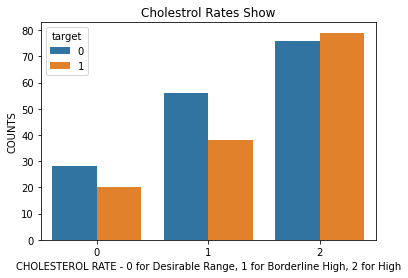

In [ ]:
sns.countplot(chol,hue=df['target'])
plt.title('Cholestrol Rates Show')
plt.xlabel('CHOLESTEROL RATE - 0 for Desirable Range, 1 for Borderline High, 2 for High')
plt.ylabel('COUNTS')
plt.show()

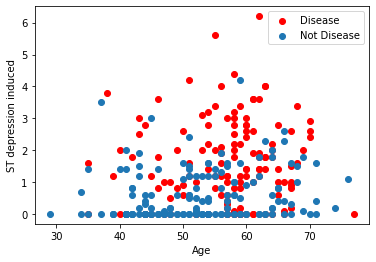

In [ ]:
plt.scatter(x=df.age[df.target==1], y=df.oldpeak[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.oldpeak[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("ST depression induced")
plt.show()

if your resting heart rate is consistently above 100 beats a minute (tachycardia) or if you're not a trained athlete and your resting heart rate is below 60 beats a minute (bradycardia) 

In [ ]:
max_heart_rate = df['thalach']

In [ ]:
max_heart_rate

0      150
1      108
2      129
3      187
4      172
      ... 
292    123
293    132
294    141
295    115
296    174
Name: thalach, Length: 297, dtype: int64

In [ ]:
max_heart_rate = max_heart_rate.apply(lambda c: 0 if c<60 else 1 if ((c>=60) and (c<=100)) else 2)

In [ ]:
max_heart_rate

0      2
1      2
2      2
3      2
4      2
      ..
292    2
293    2
294    2
295    2
296    2
Name: thalach, Length: 297, dtype: int64

AGE ANALYSIS

In [ ]:
df['age'].value_counts()

58    18
57    17
54    16
59    14
51    12
60    12
62    11
44    11
52    11
56    11
64    10
41    10
67     9
63     9
65     8
61     8
42     8
55     8
45     8
46     7
50     7
43     7
53     7
66     7
48     7
47     5
49     5
39     4
70     4
35     4
68     4
69     3
40     3
71     3
34     2
37     2
77     1
38     1
76     1
74     1
29     1
Name: age, dtype: int64

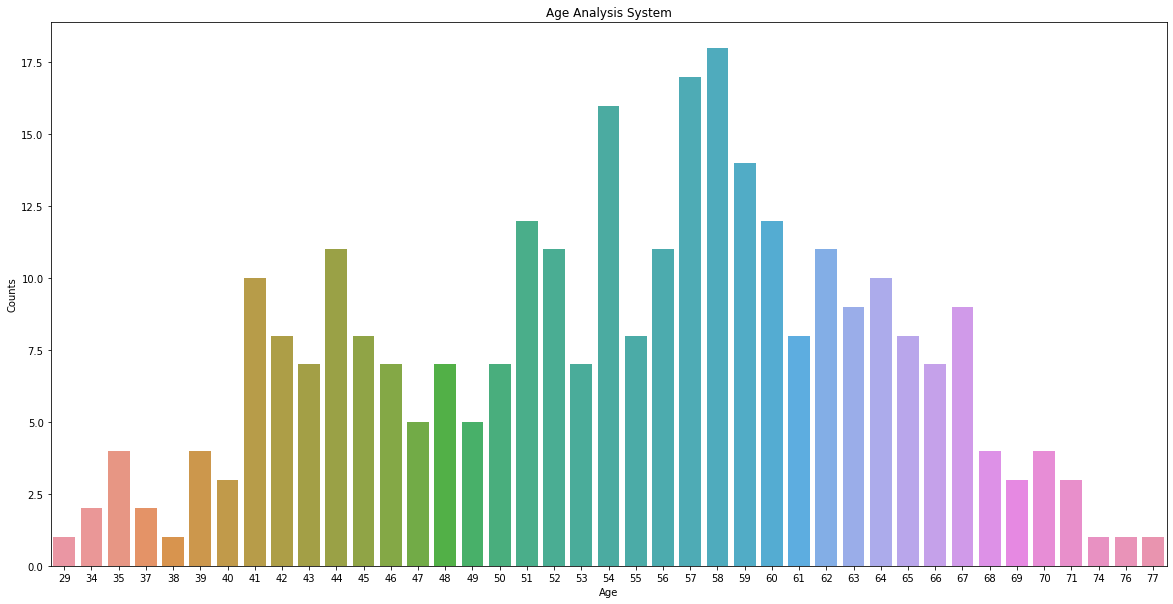

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['age'].value_counts().index,y=df['age'].value_counts().values)
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Age Analysis System')
plt.show()

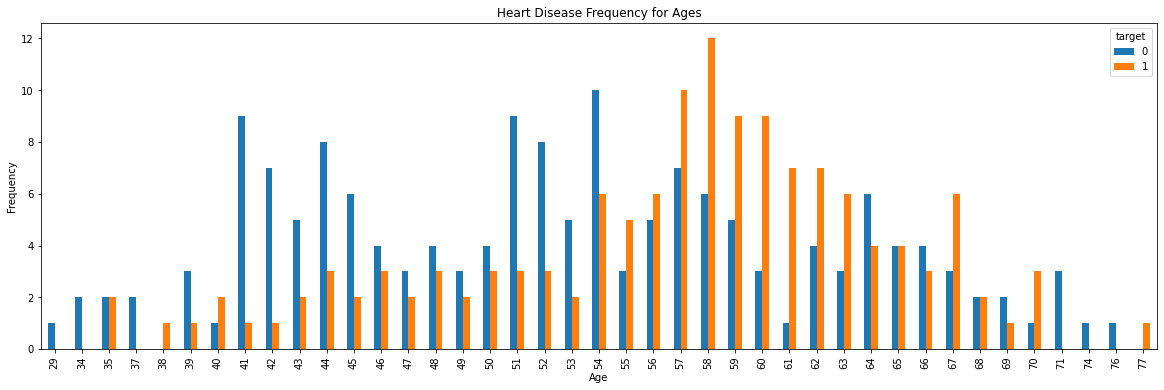

In [ ]:
pd.crosstab(df['age'],df['target']).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
#plt.savefig('HeartDiseaseAndAges.png')
plt.show()

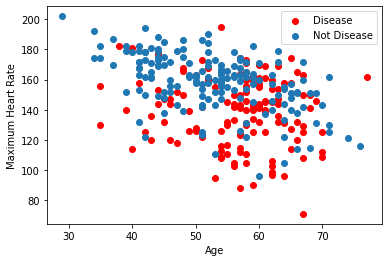

In [ ]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [ ]:
young_ages=df[(df['age']>=29)&(df['age']<40)]
middle_ages=df[(df['age']>=40)&(df['age']<55)]
elderly_ages=df[(df['age']>55)]

In [ ]:
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))

Young Ages : 14
Middle Ages : 124
Elderly Ages : 151


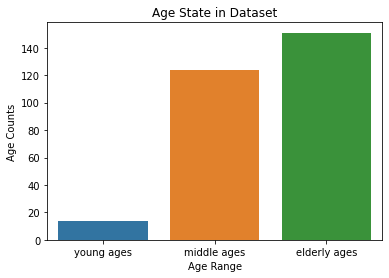

In [ ]:
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Age State in Dataset')
plt.show()

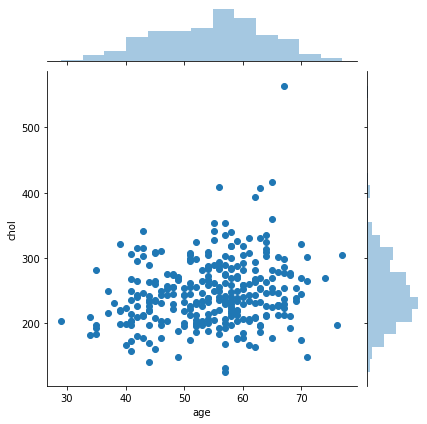

In [ ]:
sns.jointplot(x='age',y='chol',data=df)

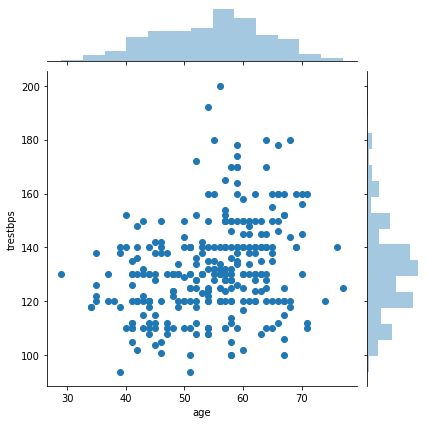

In [ ]:
sns.jointplot(x='age',y='trestbps',data=df)

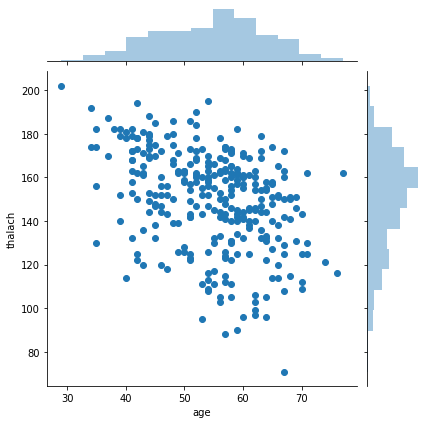

In [ ]:
sns.jointplot(x='age',y='thalach',data=df)

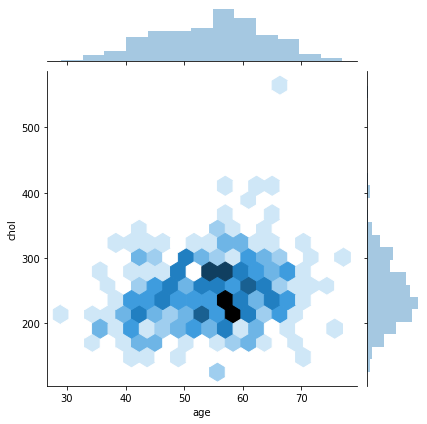

In [ ]:
sns.jointplot(x='age',y='chol',data=df,kind='hex')

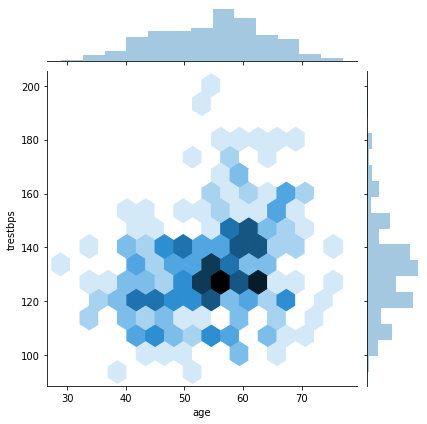

In [ ]:
sns.jointplot(x='age',y='trestbps',data=df,kind='hex')

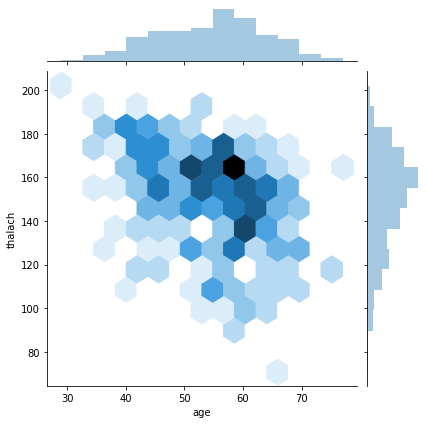

In [ ]:
sns.jointplot(x='age',y='thalach',data=df,kind='hex')

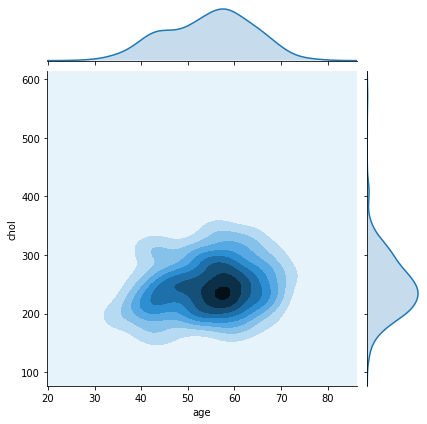

In [ ]:
sns.jointplot(x='age',y='chol',data=df,kind='kde')

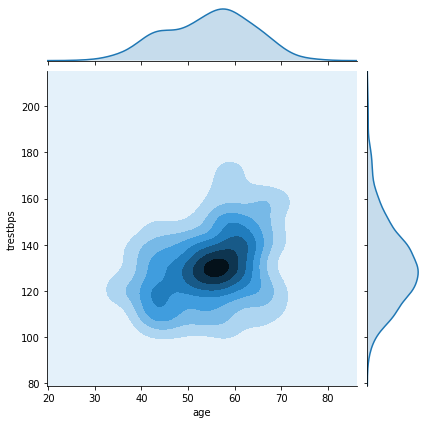

In [ ]:
sns.jointplot(x='age',y='trestbps',data=df,kind='kde')

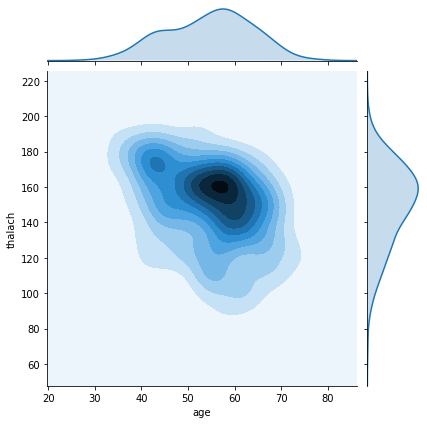

In [ ]:
sns.jointplot(x='age',y='thalach',data=df,kind='kde')

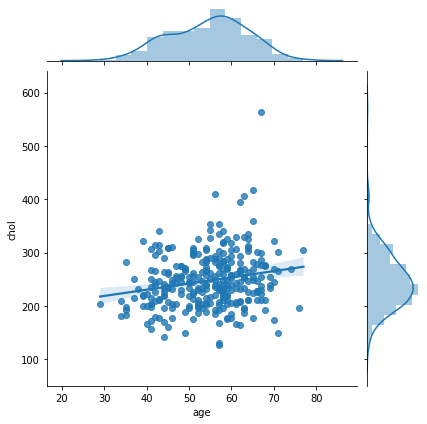

In [ ]:
sns.jointplot(x='age',y='chol',data=df,kind='reg')

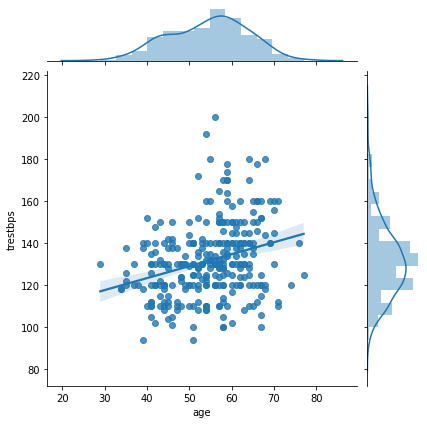

In [ ]:
sns.jointplot(x='age',y='trestbps',data=df,kind='reg')

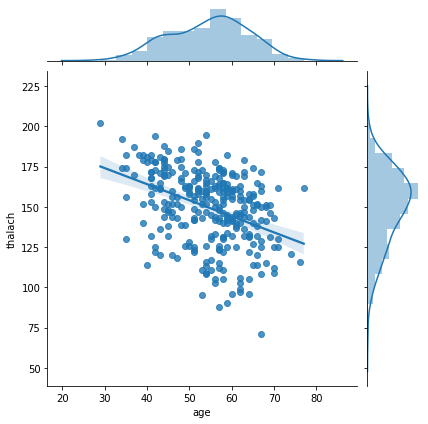

In [ ]:
sns.jointplot(x='age',y='thalach',data=df,kind='reg')

SEX ANALYSIS

In [ ]:
df['sex'].value_counts()

1    201
0     96
Name: sex, dtype: int64

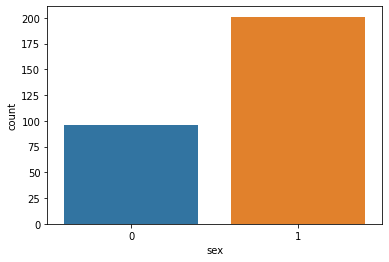

In [ ]:
#Sex (1 = male; 0 = female)
sns.countplot(df['sex'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


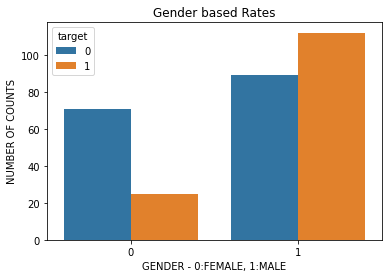

In [ ]:
sns.countplot(df['sex'],hue=df['target'])
plt.title('Gender based Rates')
plt.xlabel('GENDER - 0:FEMALE, 1:MALE')
plt.ylabel('NUMBER OF COUNTS')
plt.show()

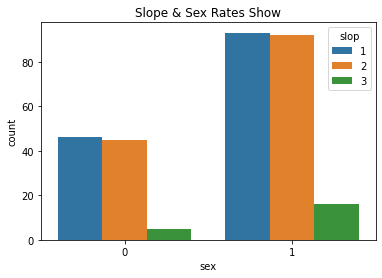

In [ ]:
sns.countplot(df['sex'],hue=df['slop'])
plt.title('Slope & Sex Rates Show')
plt.show()

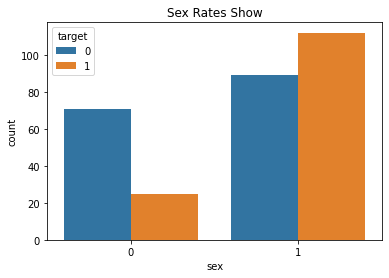

In [ ]:
sns.countplot(df['sex'],hue=df['target'])
plt.title('Sex Rates Show')
plt.show()

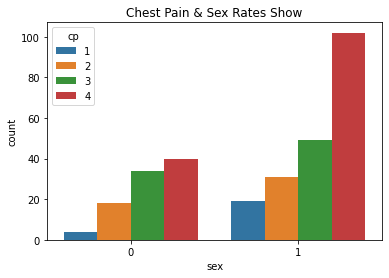

In [ ]:
sns.countplot(df['sex'],hue=df['cp'])
plt.title('Chest Pain & Sex Rates Show')
plt.show()

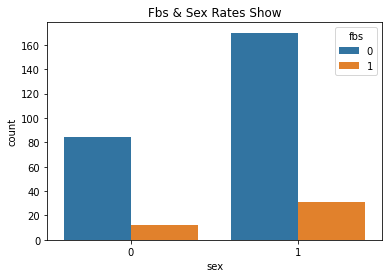

In [ ]:
sns.countplot(df['sex'],hue=df['fbs'])
plt.title('Fbs & Sex Rates Show')
plt.show()

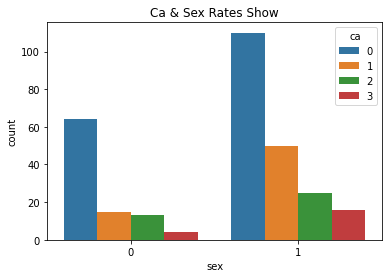

In [ ]:
sns.countplot(df['sex'],hue=df['ca'])
plt.title('Ca & Sex Rates Show')
plt.show()

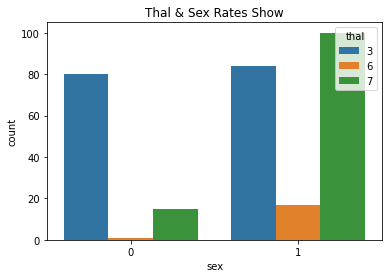

In [ ]:
sns.countplot(df['sex'],hue=df['thal'])
plt.title('Thal & Sex Rates Show')
plt.show()

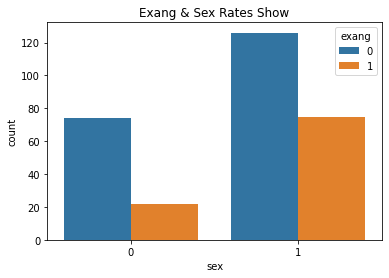

In [ ]:
sns.countplot(df['sex'],hue=df['exang'])
plt.title('Exang & Sex Rates Show')
plt.show()

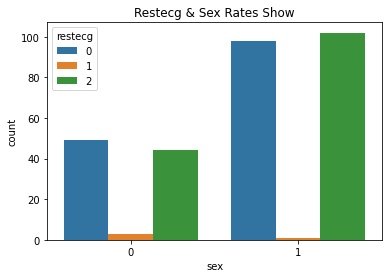

In [ ]:
sns.countplot(df['sex'],hue=df['restecg'])
plt.title('Restecg & Sex Rates Show')
plt.show()

Chest Pain Analysis

In [ ]:
df['cp'].value_counts()

4    142
3     83
2     49
1     23
Name: cp, dtype: int64

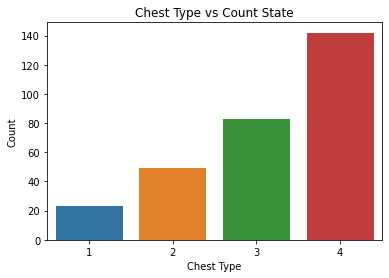

In [ ]:
sns.countplot(df['cp'])
plt.xlabel('Chest Type')
plt.ylabel('Count')
plt.title('Chest Type vs Count State')
plt.show()

In [ ]:
cp_one_target_zero=len(df[(df['cp']==1)&(df['target']==0)])
cp_one_target_one=len(df[(df['cp']==1)&(df['target']==1)])

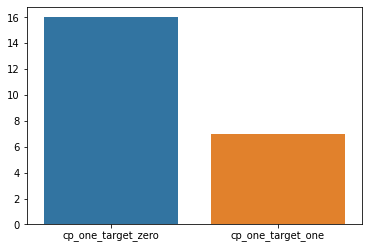

In [ ]:
sns.barplot(x=['cp_one_target_zero','cp_one_target_one'],y=[cp_one_target_zero,cp_one_target_one])
plt.show()

In [ ]:
cp_two_target_zero=len(df[(df['cp']==2)&(df['target']==0)])
cp_two_target_one=len(df[(df['cp']==2)&(df['target']==1)])

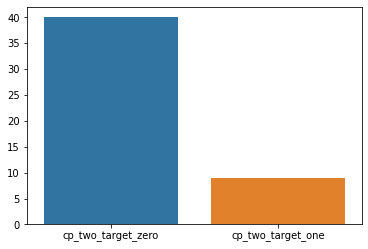

In [ ]:
sns.barplot(x=['cp_two_target_zero','cp_two_target_one'],y=[cp_two_target_zero,cp_two_target_one])
plt.show()

In [ ]:
cp_three_target_zero=len(df[(df['cp']==3)&(df['target']==0)])
cp_three_target_one=len(df[(df['cp']==3)&(df['target']==1)])

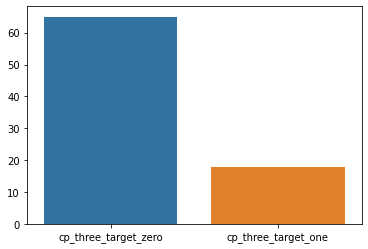

In [ ]:
sns.barplot(x=['cp_three_target_zero','cp_three_target_one'],y=[cp_three_target_zero,cp_three_target_one])
plt.show()

In [ ]:
cp_four_target_zero=len(df[(df['cp']==4)&(df['target']==0)])
cp_four_target_one=len(df[(df['cp']==4)&(df['target']==1)])

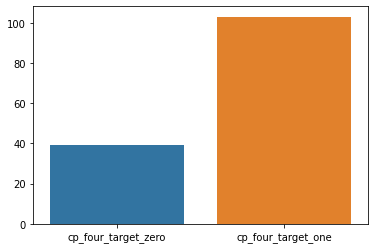

In [ ]:
sns.barplot(x=['cp_four_target_zero','cp_four_target_one'],y=[cp_four_target_zero,cp_four_target_one])
plt.show()

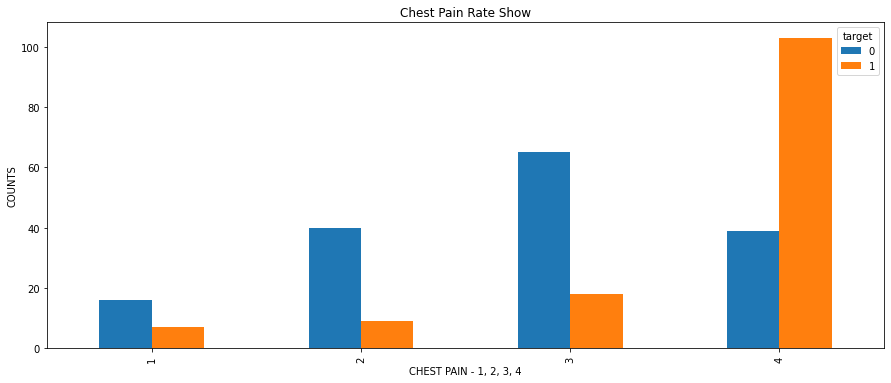

In [ ]:
pd.crosstab(df['cp'],df['target']).plot(kind="bar",figsize=(15,6))
plt.title('Chest Pain Rate Show')
plt.xlabel('CHEST PAIN - 1, 2, 3, 4')
plt.ylabel('COUNTS')
#plt.savefig('eartDiseaseAndAges.png')
plt.show()

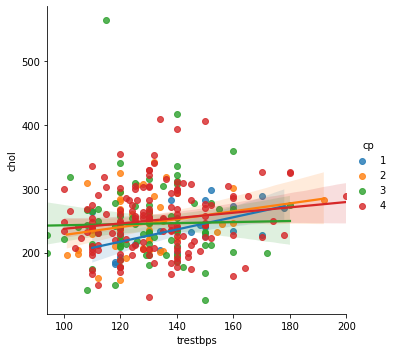

In [ ]:
sns.lmplot(x="trestbps", y="chol",data=df,hue="cp")
plt.show()

OTHER ANALYSIS

In [ ]:
df['thalach'].value_counts()

162    11
160     9
163     9
152     8
172     7
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

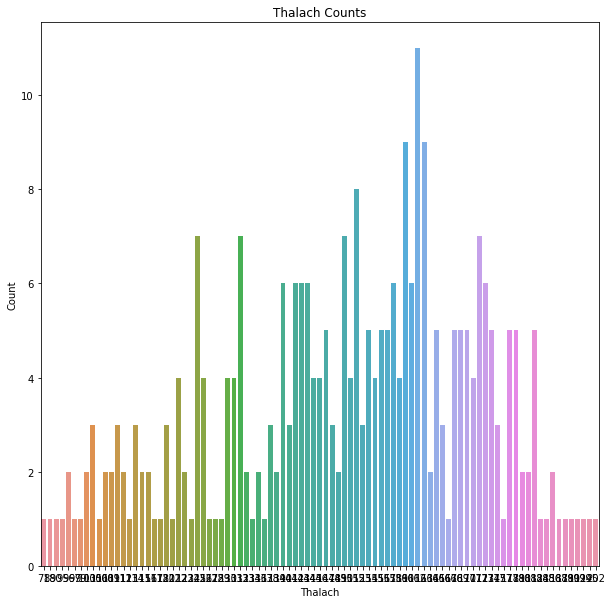

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['thalach'].value_counts().index,y=df['thalach'].value_counts().values)
plt.xlabel('Thalach')
plt.ylabel('Count')
plt.title('Thalach Counts')
plt.show()

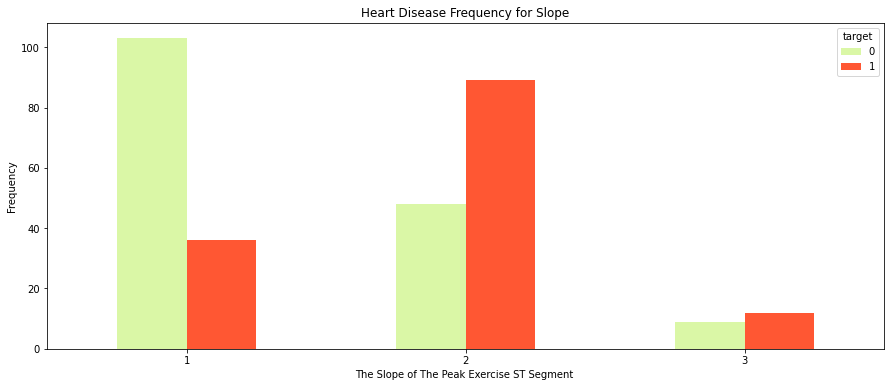

In [ ]:
pd.crosstab(df.slop,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

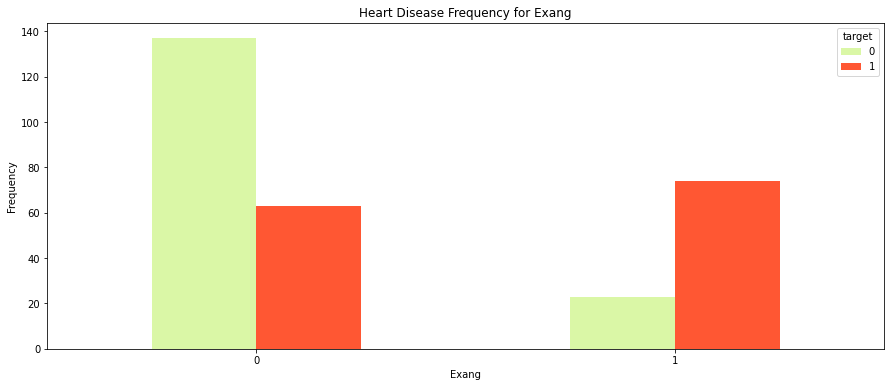

In [ ]:
pd.crosstab(df.exang,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Exang')
plt.xlabel('Exang')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

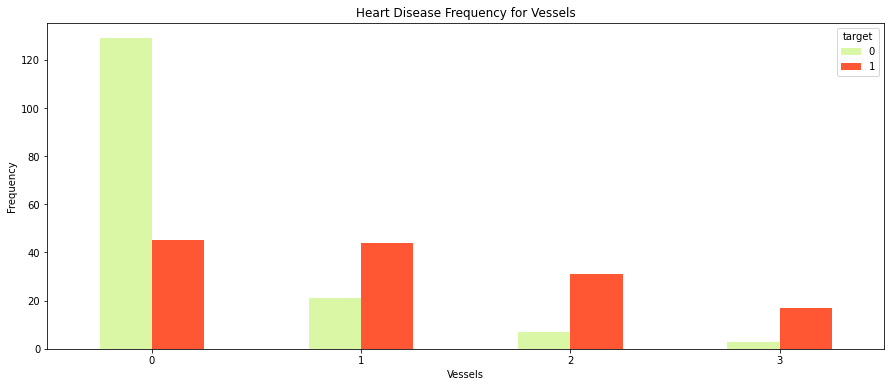

In [ ]:
pd.crosstab(df.ca,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Vessels')
plt.xlabel('Vessels')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

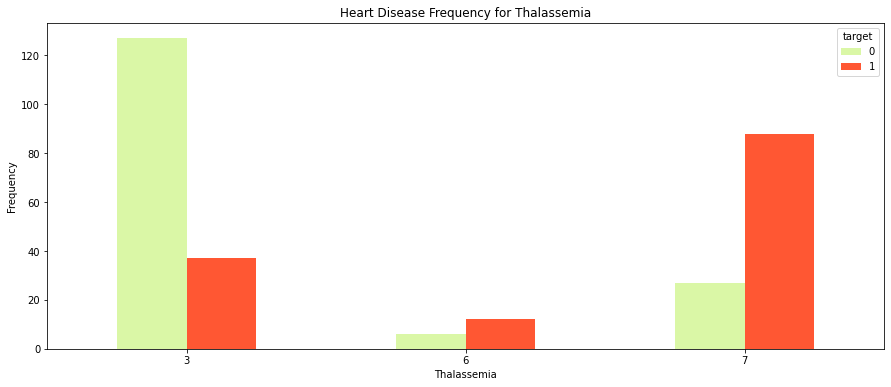

In [ ]:
pd.crosstab(df.thal,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Thalassemia')
plt.xlabel('Thalassemia')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

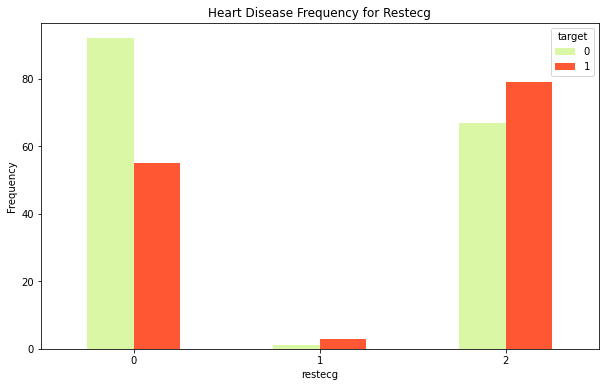

In [ ]:
pd.crosstab(df.restecg,df.target).plot(kind="bar",figsize=(10,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Restecg')
plt.xlabel('restecg')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

After doing the Investigation and Exploratory Data Analysis of the Dataset, some major
conclusions have been derived. They are: -
1. Most numbers of heart disease cases have been found in those persons whose age is
above 55, that is, the category of elderly people is mostly affected.
2. In the case of sex, male patients have high chances of heart disease than female
patients. There are several reasons that may lead to this such as angry or hostile nature
of men, a low amount of testosterone in men, etc.
3. This shows that Chest pain of level 4 is found more in males than other levels while in
female, level 4 & 3 is more frequent than other levels. Most of the cases of Heart
Disease have been found in those persons who are having Chest pain levels equal to 4.
4. This shows that males and females, in general, have a Fasting blood sugar level less
than 120 mg/dl.
There are more cases for patients having Fasting blood sugar less than 120mg/dl.
5. Thalassemia is an inherited blood disorder characterized by less oxygen-carrying
protein (haemoglobin) and fewer red blood cells in the body than normal. The thal
values of 3 are common in females and the value of 7 is common in males. The value 6
is not common in both males and females. Healthy people mostly showed a normal
heart status while sick people showed mostly a reversible defect condition, that is,
value 7.
6. Considering slope values in the dataset, the value of 1 & 2 is common in both males
and females where else the value of 3 is not that common. The majority of people from
the healthy groups have had up sloping exercise while the majority of patients with
heart disease have had flat exercise ST segment. The slope value 2 has recorded the
greatest number of cases of Heart Disease.
7. Exang data values show that in both males and female the value of 0 is more common
which means most of the persons haven’t had exercise-induced angina. But having
exercise-induced angina for a patient with heart disease is more prominent than a
patient without heart disease. This shows having exercise-induced angina may be a
deciding factor for having a heart disease.
8. Considering ca data values, we can see many patients reported value for ca as zero,
and the distribution looks like inverse exponential. The same pattern persists for ca
value for healthy people too. However, for sick people, both values 0 and 1 are equally
important.
9. Considering Resting electrocardiographic measurement values, Healthy people
showed normal ECG results while patients with heart disease showed an ECG result of
level 2. The result of level 1 is not a common type of ECG result for none of the patient
groups.
10. For the average person who is not at high risk for hypertension, we aim for a total
blood pressure of 120/80 or lower. If your blood pressure is higher than 120/80, you
could be at risk for heart disease.
11. With respect to Cholesterol, the values of less than 200 are desirable, the values
between 200-239 are said to be borderline high and finally, 240 or above is said to be
high.